# Importing Libraries

In [57]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor 
import lightgbm as lgb


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wids-datathon-2022/train.csv/train.csv
/kaggle/input/wids-datathon-2022/test.csv/test.csv


# Importing datasets
Train dataset and test datset

In [58]:
train = pd.read_csv('/kaggle/input/wids-datathon-2022/train.csv/train.csv')

In [59]:
test =  pd.read_csv('/kaggle/input/wids-datathon-2022/test.csv/test.csv')

In [60]:
train.shape


(75757, 64)

In [61]:
test.shape

(9705, 63)

In [62]:
train

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


In [63]:
train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [64]:
train.isna().sum().sum()

198317

# Preprocessing 
1. Null Value Imputation
2. Categorical to Numerical Values

In [65]:
percent_missing = train.isnull().sum() * 100/len(train)
missing_value_train = pd.DataFrame({'column_name' : train.columns,'percent_missing':percent_missing})
missing_value_train

,column_name,percent_missing
Year_Factor,Year_Factor,0.000000
State_Factor,State_Factor,0.000000
building_class,building_class,0.000000
facility_type,facility_type,0.000000
floor_area,floor_area,0.000000
...,...,...
direction_peak_wind_speed,direction_peak_wind_speed,55.190939
max_wind_speed,max_wind_speed,54.228652
days_with_fog,days_with_fog,60.451179
site_eui,site_eui,0.000000


In [66]:
NA_more_than_60 = []
for i in missing_value_train['column_name']:
    if(percent_missing[i] >= 60):
        NA_more_than_60.append(i)
print(len(NA_more_than_60))
print(NA_more_than_60)

1
['days_with_fog']


In [67]:
for i in train.columns:
    if i in NA_more_than_60:
        train.drop(i, axis=1, inplace=True)

In [68]:
train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,0.000000,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,0.000000,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,0.000000,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,31.000000,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,997.866120,75756.000000


In [69]:
train = train.fillna(train.mean()) 
train

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.000000,2.4,36,50.500000,...,0,14,0,0,0,1.000000,1.000000,1.000000,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.000000,1.8,36,50.500000,...,0,14,0,0,0,1.000000,62.779974,1.000000,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.000000,1.8,36,50.500000,...,0,14,0,0,0,1.000000,62.779974,1.000000,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.000000,1.8,36,50.500000,...,0,14,0,0,0,1.000000,62.779974,1.000000,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.000000,2.4,36,50.500000,...,0,14,0,0,0,1.000000,1.000000,1.000000,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.000000,36.6,28,43.451613,...,0,25,3,0,0,66.552675,62.779974,4.190601,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.000000,36.6,28,43.451613,...,0,25,3,0,0,66.552675,62.779974,4.190601,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,61.048605,36.6,26,36.612903,...,0,6,0,0,0,66.552675,62.779974,4.190601,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,61.048605,36.6,26,36.612903,...,0,6,0,0,0,66.552675,62.779974,4.190601,592.022750,75755


In [70]:
train.isna().sum().sum()

0

In [71]:
categorical_cols=[c for c in train.columns if (1<train[c].nunique()) & (train[c].dtype != np.number)& (train[c].dtype != int)]
categorical_cols

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """Entry point for launching an IPython kernel.


['State_Factor', 'building_class', 'facility_type']

In [72]:
le = LabelEncoder()
train['State_Factor'] = le.fit_transform(train['State_Factor'])
train['building_class'] = le.fit_transform(train['building_class'])
train['facility_type'] = le.fit_transform(train['facility_type'])

In [73]:
train

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.000000,2.4,36,50.500000,...,0,14,0,0,0,1.000000,1.000000,1.000000,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.000000,1.8,36,50.500000,...,0,14,0,0,0,1.000000,62.779974,1.000000,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.000000,1.8,36,50.500000,...,0,14,0,0,0,1.000000,62.779974,1.000000,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.000000,1.8,36,50.500000,...,0,14,0,0,0,1.000000,62.779974,1.000000,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.000000,2.4,36,50.500000,...,0,14,0,0,0,1.000000,1.000000,1.000000,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2,0,32,20410.0,1995.0,8.000000,36.6,28,43.451613,...,0,25,3,0,0,66.552675,62.779974,4.190601,132.918411,75752
75753,6,2,1,1,40489.0,1910.0,98.000000,36.6,28,43.451613,...,0,25,3,0,0,66.552675,62.779974,4.190601,39.483672,75753
75754,6,2,0,2,28072.0,1917.0,61.048605,36.6,26,36.612903,...,0,6,0,0,0,66.552675,62.779974,4.190601,48.404398,75754
75755,6,2,0,2,53575.0,2012.0,61.048605,36.6,26,36.612903,...,0,6,0,0,0,66.552675,62.779974,4.190601,592.022750,75755


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

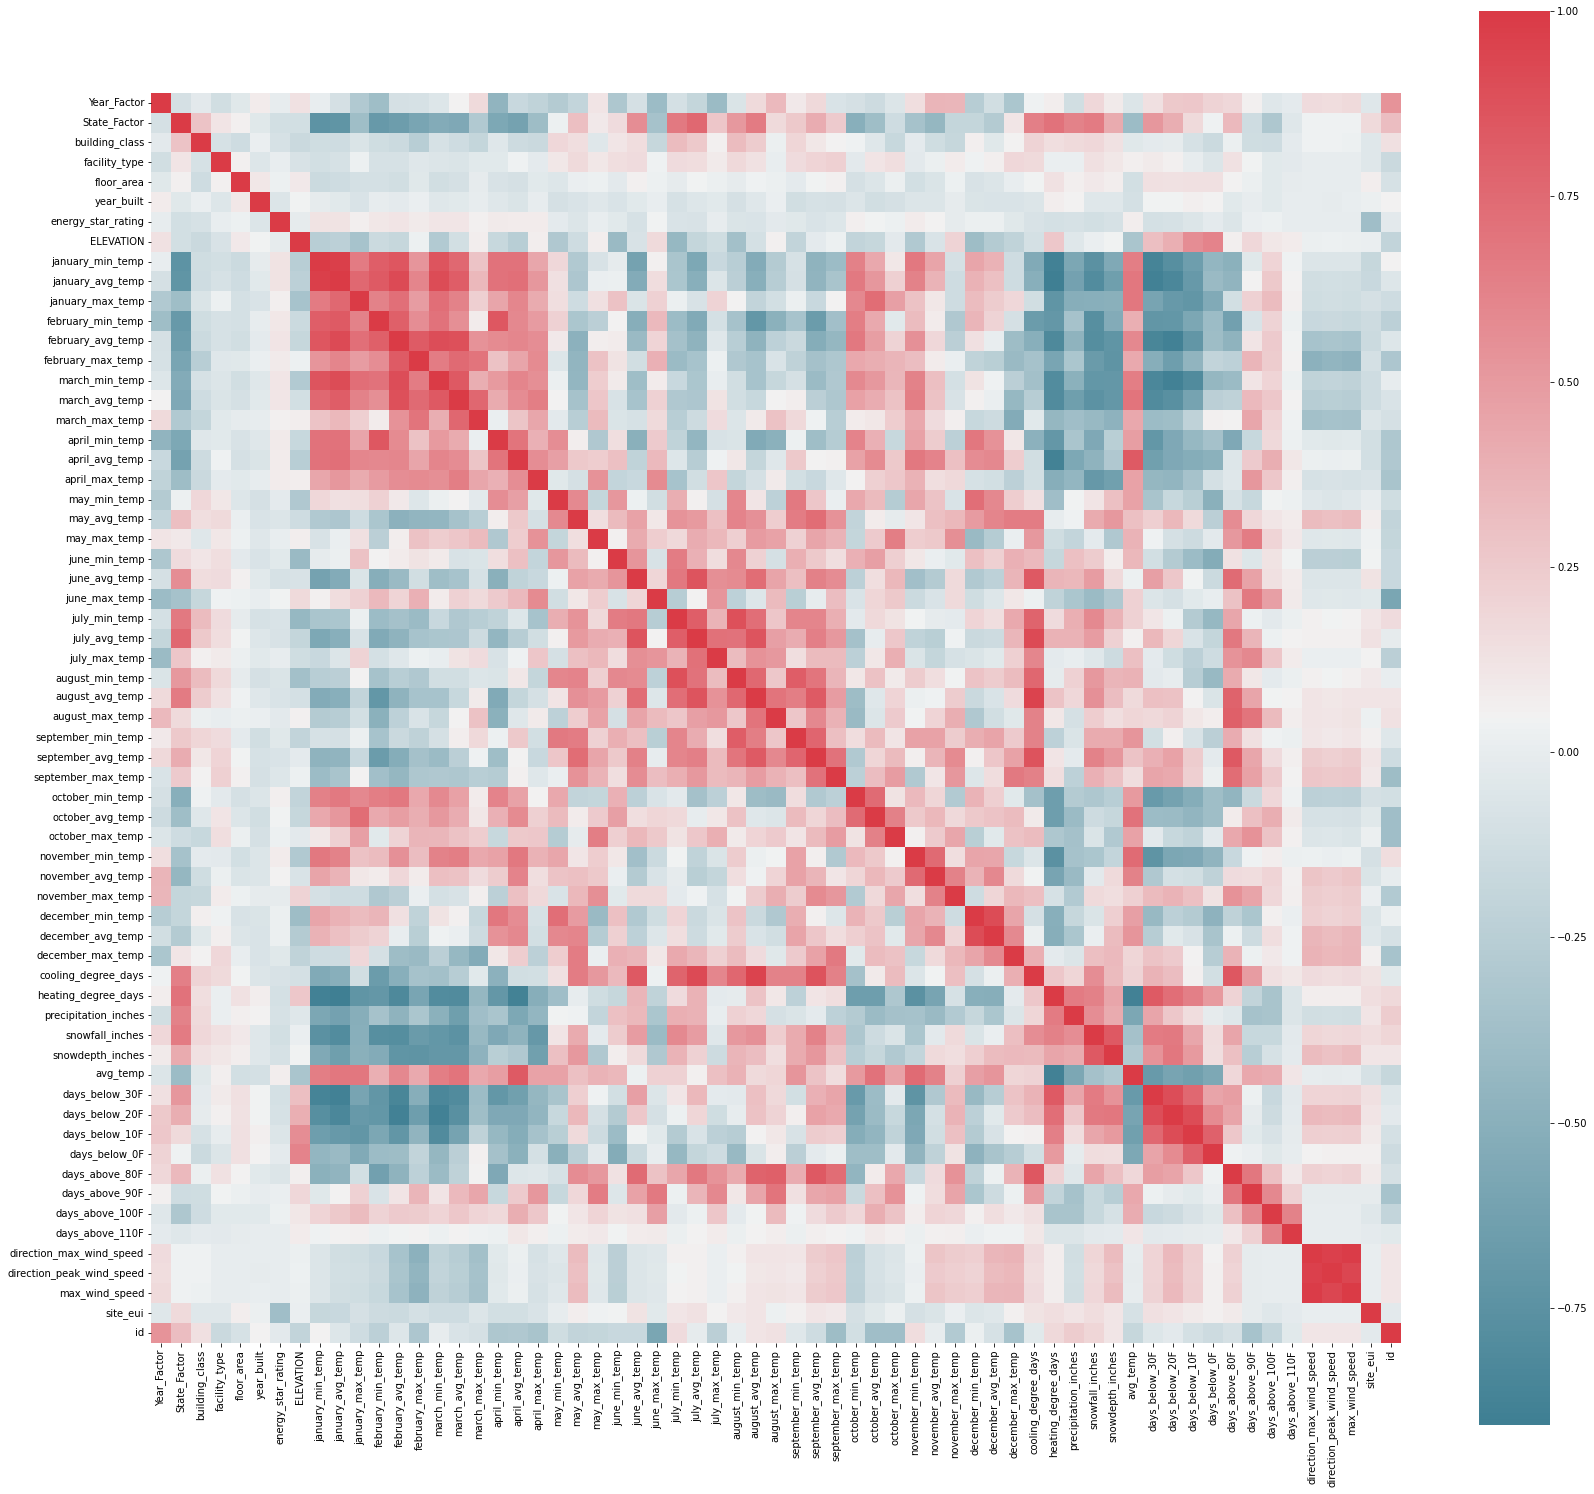

In [74]:
f, ax=plt.subplots(figsize=(28,26))
corr=train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

# Feature scaling
Using Standard scaler

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(train)
print(scaled)

[[-2.28876040e+00 -2.73502847e+00 -1.16308853e+00 ... -7.30181542e-01
   2.85122086e+00 -1.73202794e+00]
 [-2.28876040e+00 -2.73502847e+00 -1.16308853e+00 ... -7.30181542e-01
  -9.62741832e-01 -1.73198222e+00]
 [-2.28876040e+00 -2.73502847e+00 -1.16308853e+00 ... -7.30181542e-01
  -9.93752559e-01 -1.73193649e+00]
 ...
 [ 1.10929044e+00 -1.44431120e+00 -1.16308853e+00 ...  4.06526186e-16
  -5.86735632e-01  1.73193649e+00]
 [ 1.10929044e+00 -1.44431120e+00 -1.16308853e+00 ...  4.06526186e-16
   8.74496436e+00  1.73198222e+00]
 [ 1.10929044e+00 -1.44431120e+00  8.59779779e-01 ...  4.06526186e-16
  -9.17174346e-01  1.73202794e+00]]


# Dropping highly correlated columns

In [76]:
cor_matrix = train.corr().abs()
print(cor_matrix)

                           Year_Factor  State_Factor  building_class  \
Year_Factor                   1.000000      0.096798        0.026198   
State_Factor                  0.096798      1.000000        0.288096   
building_class                0.026198      0.288096        1.000000   
facility_type                 0.120038      0.119659        0.092227   
floor_area                    0.036363      0.061200        0.133585   
...                                ...           ...             ...   
direction_max_wind_speed      0.165473      0.033032        0.032890   
direction_peak_wind_speed     0.152557      0.032381        0.031786   
max_wind_speed                0.167139      0.033002        0.027573   
site_eui                      0.045179      0.165703        0.046794   
id                            0.534754      0.321324        0.139222   

                           facility_type  floor_area  year_built  \
Year_Factor                     0.120038    0.036363    0.082688   

In [77]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                           Year_Factor  State_Factor  building_class  \
Year_Factor                        NaN      0.096798        0.026198   
State_Factor                       NaN           NaN        0.288096   
building_class                     NaN           NaN             NaN   
facility_type                      NaN           NaN             NaN   
floor_area                         NaN           NaN             NaN   
...                                ...           ...             ...   
direction_max_wind_speed           NaN           NaN             NaN   
direction_peak_wind_speed          NaN           NaN             NaN   
max_wind_speed                     NaN           NaN             NaN   
site_eui                           NaN           NaN             NaN   
id                                 NaN           NaN             NaN   

                           facility_type  floor_area  year_built  \
Year_Factor                     0.120038    0.036363    0.082688   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [78]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(); print(to_drop)



['january_avg_temp', 'february_avg_temp', 'march_min_temp', 'march_avg_temp', 'july_avg_temp', 'august_min_temp', 'august_avg_temp', 'december_avg_temp', 'cooling_degree_days', 'heating_degree_days', 'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'direction_peak_wind_speed', 'max_wind_speed']


In [79]:
df1 = train.drop(['january_avg_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'april_min_temp', 'july_avg_temp', 'august_min_temp', 'august_avg_temp', 'september_min_temp', 'september_avg_temp', 'december_avg_temp', 'cooling_degree_days', 'heating_degree_days', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_above_80F', 'direction_peak_wind_speed', 'max_wind_speed','days_below_0F','days_above_90F','days_above_100F','days_above_110F'], axis=1)
print(); print(df1.head())


   Year_Factor  State_Factor  building_class  facility_type  floor_area  \
0            1             0               0             13     61242.0   
1            1             0               0             55    274000.0   
2            1             0               0             48    280025.0   
3            1             0               0              6     55325.0   
4            1             0               0             56     66000.0   

   year_built  energy_star_rating  ELEVATION  january_min_temp  \
0      1942.0                11.0        2.4                36   
1      1955.0                45.0        1.8                36   
2      1951.0                97.0        1.8                36   
3      1980.0                46.0        1.8                36   
4      1985.0               100.0        2.4                36   

   january_max_temp  ...  november_min_temp  november_avg_temp  \
0                68  ...                 43               53.8   
1                68

In [80]:
df1

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_max_temp,...,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_max_temp,precipitation_inches,snowfall_inches,direction_max_wind_speed,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.000000,2.4,36,68,...,43,53.800000,72,36,71,16.59,0.0,1.000000,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.000000,1.8,36,68,...,43,53.800000,72,36,71,16.59,0.0,1.000000,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.000000,1.8,36,68,...,43,53.800000,72,36,71,16.59,0.0,1.000000,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.000000,1.8,36,68,...,43,53.800000,72,36,71,16.59,0.0,1.000000,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.000000,2.4,36,68,...,43,53.800000,72,36,71,16.59,0.0,1.000000,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2,0,32,20410.0,1995.0,8.000000,36.6,28,56,...,40,51.283333,71,24,51,45.03,1.4,66.552675,132.918411,75752
75753,6,2,1,1,40489.0,1910.0,98.000000,36.6,28,56,...,40,51.283333,71,24,51,45.03,1.4,66.552675,39.483672,75753
75754,6,2,0,2,28072.0,1917.0,61.048605,36.6,26,48,...,34,44.650000,62,15,46,106.32,36.6,66.552675,48.404398,75754
75755,6,2,0,2,53575.0,2012.0,61.048605,36.6,26,48,...,34,44.650000,62,15,46,106.32,36.6,66.552675,592.022750,75755


# Splitting the train dataset 

In [81]:
from sklearn.model_selection import cross_validate

In [82]:
y=df1.site_eui
x=df1.drop('site_eui',axis=1)

In [83]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                         test_size=0.2, random_state=42)


In [84]:
print("shape of original dataset :", train.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (75757, 63)
shape of input - training set (60605, 35)
shape of output - training set (60605,)
shape of input - testing set (15152, 35)
shape of output - testing set (15152,)


# Applying Models and Predicting 

# Linear Regression model

In [85]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [86]:
predict = model.predict(x_test)

In [87]:
r2_score(y_test,predict)

0.20106942707175157

# Random Forest model

In [88]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


In [89]:
r2_score(y_test,y_pred)

0.4605956125256262

# LightGBM model


In [90]:
import lightgbm as lgb

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(x_train, y_train)
print(); print(LGB_model)


LGBMRegressor()


In [91]:
expected_y  = y_test
predicted_y = LGB_model.predict(x_test)


In [92]:
r2_score(expected_y, predicted_y)

0.47752419428024473

# XGBoost Model

In [93]:
from xgboost import XGBRegressor 
XGB_model = XGBRegressor()  
XGB_model.fit(x_train , y_train)  
print(XGB_model)  

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [94]:
y_prediction = XGB_model.predict(x_test)  
predictions = [round(value) for value in y_prediction]  

r2_score(y_test,predictions)

0.5106622927010787

In [95]:
res=XGB_model.predict(x_test)
res

array([106.28342 ,  50.774292,  80.60972 , ...,  91.5755  ,  97.30868 ,
        68.05734 ], dtype=float32)

In [96]:
res.shape

(15152,)

In [97]:
t=res.reshape(15152,1)
k=[]
for i in t:
    k.append(i)

In [98]:
k1=[]
for i in range(15152):
    k1.append(k[i][0])
k1

[106.28342,
 50.774292,
 80.60972,
 77.05652,
 30.411251,
 86.52678,
 89.58164,
 28.894396,
 23.581072,
 80.812744,
 75.175606,
 78.78213,
 23.665049,
 67.870575,
 276.43857,
 25.536648,
 133.70299,
 18.710333,
 77.218094,
 99.061386,
 87.41742,
 84.95192,
 93.00461,
 120.191986,
 81.164955,
 81.36274,
 41.399696,
 116.12183,
 56.620186,
 87.74628,
 110.092255,
 90.51618,
 135.92188,
 90.03985,
 63.666668,
 46.253075,
 78.018295,
 83.53752,
 58.304634,
 44.28156,
 123.27912,
 94.21646,
 271.95663,
 22.81092,
 20.75382,
 93.97356,
 22.08093,
 83.42086,
 84.03426,
 77.411476,
 84.67901,
 68.10787,
 62.49133,
 103.092804,
 100.79387,
 14.628728,
 101.12679,
 64.01232,
 95.572945,
 91.097115,
 80.46638,
 94.91785,
 86.8737,
 101.61807,
 44.301296,
 49.079266,
 73.387924,
 64.93578,
 83.53112,
 132.21411,
 80.1012,
 162.83473,
 87.23627,
 72.790474,
 119.93379,
 200.12126,
 56.782707,
 49.900608,
 88.92601,
 59.384438,
 107.44259,
 39.790497,
 96.71556,
 199.59415,
 78.31883,
 82.491135,
 7

# Inserting the predicting values in the test dataset

In [100]:
for i in range(0,15152):
    x_test["site_eui"]=k1
x_test

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_max_temp,...,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_max_temp,precipitation_inches,snowfall_inches,direction_max_wind_speed,id,site_eui
29922,3,5,0,21,254829.0,1990.0,61.048605,15.2,11,61,...,23,45.250000,70,19,71,46.32,29.6,66.552675,29922,106.283417
55120,6,5,0,6,68480.0,1928.0,97.000000,3.4,11,59,...,34,49.766667,72,17,60,42.17,36.0,1.000000,55120,50.774292
52830,6,5,1,27,103724.0,1941.0,65.000000,10.7,11,59,...,34,49.766667,72,17,60,42.17,36.0,66.552675,52830,80.609718
47809,5,5,0,32,231938.0,1957.0,78.000000,21.3,8,56,...,32,52.783333,74,34,72,40.97,49.1,66.552675,47809,77.056519
4663,6,0,0,29,13040.0,1931.0,86.000000,2.4,37,62,...,44,58.283333,75,36,63,21.39,0.0,66.552675,4663,30.411251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,3,0,0,32,13923.0,1968.0,91.000000,9.1,22,65,...,31,52.516667,76,16,68,4.16,0.0,66.552675,2166,34.560703
21100,2,5,1,27,59000.0,1970.0,61.048605,3.4,13,62,...,31,43.866667,66,28,62,38.51,9.6,1.000000,21100,92.012680
18139,2,5,0,32,127100.0,1940.0,61.000000,15.2,13,62,...,31,43.866667,66,28,62,38.51,9.6,66.552675,18139,91.575500
62588,6,5,1,27,52926.0,1925.0,34.000000,42.7,11,59,...,34,49.766667,72,17,60,42.17,36.0,66.552675,62588,97.308678


# Deployment

In [ ]:
!pip install gradio

In [101]:
import gradio as gr

In [102]:
train.drop("site_eui",axis = 1,inplace = True)

In [103]:
train.index.name = "index"

In [104]:
index = [x for x in range(75757)]

In [105]:
train.index = index

In [106]:
import pickle

In [107]:
pickle.dump(XGB_model,open('csv.sav','wb'))

In [108]:
model = pickle.load(open('csv.sav','rb'))

In [109]:
title = "<u>Prediction of energy consumption using weather and building characteristics</u>"
description = """
<center>
The dataset was trained to predict the energy consumed by the building.Give the buliding characteristics and weather conditions.
<img src="http://www.widsconference.org/uploads/5/5/8/3/55834673/published/energy-buildings-square.jpeg?1637181898" width="600" height="600">
</center>
"""

In [110]:
def predict_res(id):
    x=x_test.id.to_numpy()
    for i in range(len(x)):
        if(id==x[i]):
            index=i
            print(index)
    return k1[index]

In [111]:
outputs = gr.outputs.Textbox()

/opt/conda/lib/python3.7/site-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [112]:
gr.Interface(predict_res, inputs="number", outputs=outputs,title = title,description = description).launch(share = True)

Running on local URL:  http://127.0.0.1:7861/
Running on public URL: https://37414.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f922df57890>,
 'http://127.0.0.1:7861/',
 'https://37414.gradio.app')